<a href="https://colab.research.google.com/github/juliosdutra/FundamentosComputacionais/blob/main/Misturador_sal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

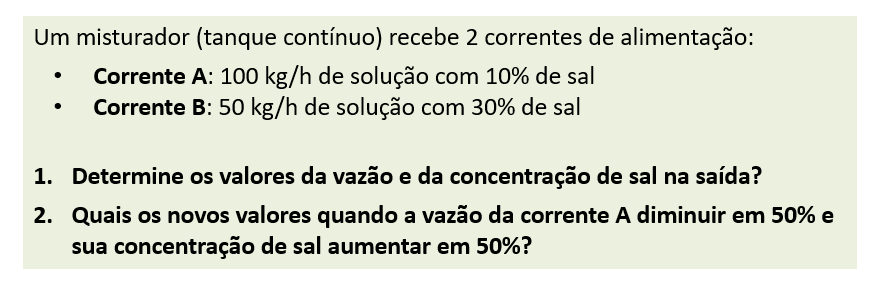

In [92]:
import numpy as np

def misturador(FA, xA, FB, xB):
    """
    Calcula a concentração de saída de um misturador em regime estacionário.
    FA, FB: Vazões (kg/h)
    xA, xB: Concentrações (% como fração, ex: 0.10 para 10%)
    Retorna: Vazão total e concentração na saída (fração)
    Levanta: ValueError para entradas inválidas

    Esta função:
     - aceita valores escalares ou arrays.
     - retorna lista de dicionários ou None se erro.

    """
    # Validações das entradas
    try:
        # Converter entradas para float, caso sejam strings numéricas
        FA = np.array(FA, dtype=float)
        xA = np.array(xA, dtype=float)
        FB = np.array(FB, dtype=float)
        xB = np.array(xB, dtype=float)

        # Verificar vazões negativas
        if np.any(FA < 0) or np.any(FB < 0):
            raise ValueError("Vazões não podem ser negativas.")

        # Verificar concentrações fora do intervalo [0, 1]
        if np.any((xA < 0) | (xA > 1)) or np.any((xB < 0) | (xB > 1)):
            raise ValueError("Concentrações devem estar entre 0 e 1.")

        # Calcular vazão total
        F_total = FA + FB

        # Verificar divisão por zero
        if np.any(F_total == 0):
          raise ValueError("Vazão total não pode ser zero.")

        # Calcular concentração de saída
        x_saida = (FA * xA + FB * xB) / F_total

        # Preparar a saída
        resultados = {"F_total": F_total, "x_saida": x_saida}

        return resultados

    except ValueError as e:
      # Captura erros de validação
      print(f"Erro na entrada: {str(e)}")
      return None


def resolve_misturador(FA, xA, FB, xB):
  r = misturador(FA, xA, FB, xB)
  if r is not None:
    print(f"Vazão total = {r['F_total']:.2f} kg/h, Concentração = {r['x_saida']:.2f}\n")
  else:
    print("Erro no cálculo. Verifique as entradas.\n")


In [93]:
FA, xA = 100.0, 0.10
FB, xB = 50, 0.30

resolve_misturador(FA, xA, FB, xB)

Vazão total = 150.00 kg/h, Concentração = 0.17



**Como iterar sobre listas ou vetores de entrada?**

Ideal para aplicações com múltiplas simulações ou séries de dados experimentais.

In [103]:
# Corrente A
lista_FA = [100, 80, 50, 20, 90, 70]
lista_xA = [0.10, 0.15, 0.20, 0.15, 0.95, 0.30]

# Corrente B
lista_FB = [50, 60, 70, 50, 25, 72]
lista_xB = [0.30, 0.25, 0.15, 0.50, 0.60, 0.45]

result = misturador(lista_FA, lista_xA, lista_FB, lista_xB)

# Transformar o resultado  em uma tabela com pandas:
import pandas as pd

df = pd.DataFrame(result)
df.index += 1  # Começa do 1 em vez de 0
df

,F_total,x_saida
1,150.0,0.166667
2,140.0,0.192857
3,120.0,0.170833
4,70.0,0.400000
5,115.0,0.873913
6,142.0,0.376056
